In [ ]:
pip install tensorflow keras scikit-learn pandas


In [ ]:
import numpy as np
import pandas as pd
import ast

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
def load_and_preprocess_train(train_csv_path):
    """
    Đọc file train.csv, chuyển đổi cột 'bug' thành nhãn 0 (clean) và 1 (buggy),
    parse cột 'int_vector_fixed' (dạng chuỗi) thành list và tạo numpy array.
    """
    df = pd.read_csv(train_csv_path)
    df['label'] = df['bug'].apply(lambda x: 1 if x == 'buggy' else 0)
    df['int_vector_fixed'] = df['int_vector_fixed'].apply(lambda x: ast.literal_eval(x))
    X = np.array(df['int_vector_fixed'].tolist())
    y = df['label'].values
    return X, y

def load_and_preprocess_test(test_csv_path):
    """
    Đọc file test.csv, parse cột 'int_vector_fixed' thành list và tạo numpy array.
    Nếu test.csv có cột 'bug' (nhãn), chuyển đổi tương tự.
    """
    df = pd.read_csv(test_csv_path)
    df['label'] = df['bug'].apply(lambda x: 1 if x == 'buggy' else 0)

    df['int_vector_fixed'] = df['int_vector_fixed'].apply(lambda x: ast.literal_eval(x))
    X = np.array(df['int_vector_fixed'].tolist())
    y = df['label'].values
    return X, y

In [35]:
test_csv_path  = r"C:\Users\Acer\Desktop\2024\lab\DP-CNN\test.csv"
X_test, y_test = load_and_preprocess_test(test_csv_path)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
def build_cnn_model(max_len, vocab_size, embedding_dim=30):
    """
    Xây dựng mô hình CNN theo kiến trúc:
      - Embedding layer 
      - Conv1D + GlobalMaxPooling1D
      - Dense (64 nút, ReLU) 
      - Dense (1 nút, sigmoid) cho phân lớp nhị phân.
    """
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Conv1D(filters=100, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
    return model

Epoch 1/15
12/12 [==============================] - 1s 22ms/step - loss: 0.6873 - accuracy: 0.5836 - val_loss: 0.6755 - val_accuracy: 0.5730
Epoch 2/15
12/12 [==============================] - 0s 12ms/step - loss: 0.6577 - accuracy: 0.5864 - val_loss: 0.6529 - val_accuracy: 0.5730
Epoch 3/15
12/12 [==============================] - 0s 16ms/step - loss: 0.6205 - accuracy: 0.5977 - val_loss: 0.6229 - val_accuracy: 0.6404
Epoch 4/15
12/12 [==============================] - 0s 14ms/step - loss: 0.5703 - accuracy: 0.7195 - val_loss: 0.5731 - val_accuracy: 0.6854
Epoch 5/15
12/12 [==============================] - 0s 13ms/step - loss: 0.4961 - accuracy: 0.7847 - val_loss: 0.5152 - val_accuracy: 0.8764
Epoch 6/15
12/12 [==============================] - 0s 11ms/step - loss: 0.4349 - accuracy: 0.9150 - val_loss: 0.4665 - val_accuracy: 0.8539
Epoch 7/15
12/12 [==============================] - 0s 13ms/step - loss: 0.3388 - accuracy: 0.9518 - val_loss: 0.4049 - val_accuracy: 0.8652
Epoch 8/15
12

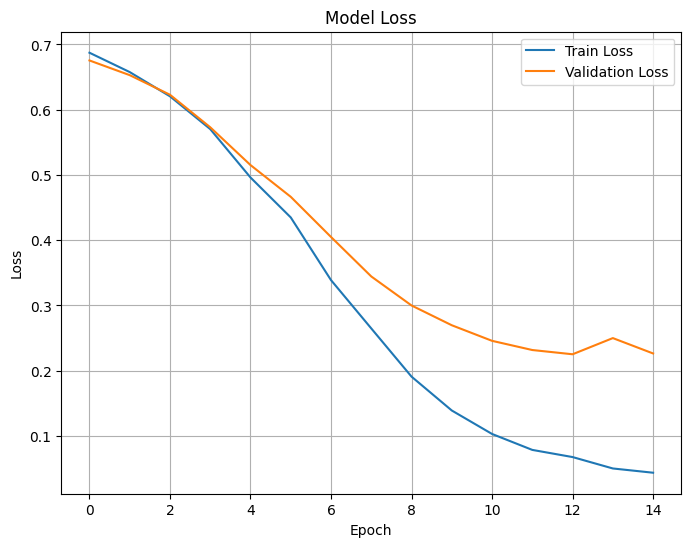

3/3 [==============================] - 0s 3ms/step
Validation: Precision: 0.8372, Recall: 0.9474, F1: 0.8889
24/24 [==============================] - 0s 4ms/step
Test: Precision: 0.5954, Recall: 0.4699, F1: 0.5253


In [ ]:
train_csv_path = r"C:\Users\Acer\Desktop\2024\lab\DP-CNN\train.csv"
test_csv_path  = r"C:\Users\Acer\Desktop\2024\lab\DP-CNN\test.csv"

X_all, y_all = load_and_preprocess_train(train_csv_path)

X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

max_len = X_train.shape[1]  
vocab_size = int(X_train.max()) + 1 #token
embedding_dim = 30

model = build_cnn_model(max_len, vocab_size, embedding_dim)

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

y_val_pred_prob = model.predict(X_val)
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print(f"Validation: Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

X_test, y_test = load_and_preprocess_test(test_csv_path)
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

if y_test is not None:
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    print(f"Test: Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1: {f1_test:.4f}")
else:
    print("Test predictions (no true labels provided):")
    print(y_test_pred)

